In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [2]:
df = pd.read_csv('lemonade.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
# set column names to lowercase
lem_cols = df.columns.to_list()
lc_lem_cols = [col.lower() for  col in lem_cols]
    

df.columns = lc_lem_cols

df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df['day_date'] = df['day'] + ' ' + df['date']

df.head()

,date,day,temperature,rainfall,flyers,price,sales,day_date
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,Sunday 1/1/17
1,1/2/17,Monday,28.9,1.33,15,0.5,13,Monday 1/2/17
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,Tuesday 1/3/17
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,Wednesday 1/4/17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,Thursday 1/5/17


In [5]:
df.day_date = pd.to_datetime(df.day_date)

df.head()

,date,day,temperature,rainfall,flyers,price,sales,day_date
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,2017-01-01
1,1/2/17,Monday,28.9,1.33,15,0.5,13,2017-01-02
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,2017-01-03
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,2017-01-04
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,2017-01-05


In [6]:
df = df.set_index(df.day_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    object        
 1   day          365 non-null    object        
 2   temperature  365 non-null    float64       
 3   rainfall     365 non-null    float64       
 4   flyers       365 non-null    int64         
 5   price        365 non-null    float64       
 6   sales        365 non-null    int64         
 7   day_date     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 25.7+ KB


In [7]:
df = df.drop(columns= ['date', 'day', 'day_date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    float64
 1   rainfall     365 non-null    float64
 2   flyers       365 non-null    int64  
 3   price        365 non-null    float64
 4   sales        365 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 17.1 KB


,temperature,rainfall,flyers,price,sales
day_date,,,,,
2017-01-01,27.0,2.00,15,0.5,10
2017-01-02,28.9,1.33,15,0.5,13
2017-01-03,34.5,1.33,27,0.5,15
2017-01-04,44.1,1.05,28,0.5,17
2017-01-05,42.4,1.00,33,0.5,18


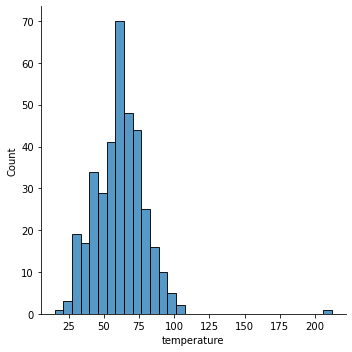

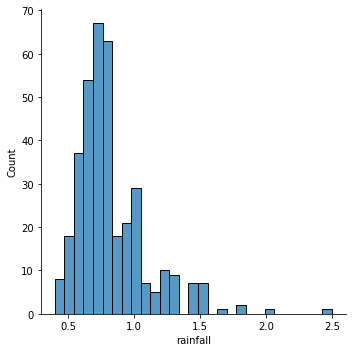

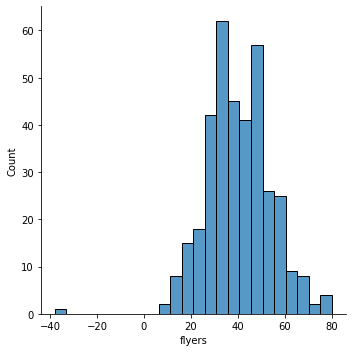

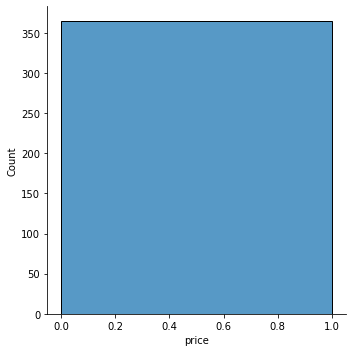

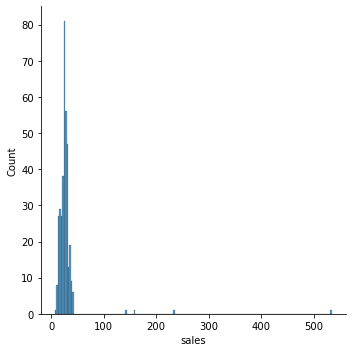

In [9]:
for col in df.columns:
    sns.displot(data=df, x=df[col])
    plt.show()

In [10]:
df.describe()

,temperature,rainfall,flyers,price,sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000
